# Week 12 Tutorial: Complexity and Performance

POP77001 Computer Programming for Social Scientists

## Benchmarking in R

-   In the lecture we used `system.time()` function to analyse function
    performance.
-   Albeit conveniently built-in, the main drawback is that it’s rather
    coarse.
-   While useful for detecting large performance gaps, it often doesn’t
    capture more subtle differences.
-   The reason is that it only runs once and uses seconds as a standard
    unit of measurement.
-   Here we will use `microbenchmark` package and identically named
    function to time function calls.
-   Remember to print out the results of `microbenchmark`, otherwise
    times of individual runs are returns.

##

In [ ]:
library("microbenchmark")

. . .

In [ ]:
# Here we run 1000 times the same function call
# and time how long it takes to run
microbenchmark::microbenchmark(
  mean(rnorm(n = 1000)),
  times = 1000
)

Unit: microseconds
                  expr    min      lq     mean  median     uq     max neval
 mean(rnorm(n = 1000)) 47.432 48.9725 56.45916 50.5885 52.554 139.738  1000

## Exercise: Compare Performance in R

-   Consider a data frame with 50 different variables below.
-   We want to know the mean of each of those variables.
-   There are 2 principal ways of estimating them:
    -   One using `apply()` function.
    -   Or using built-in `colMeans()` function.
-   Apply each of those function to calculate means.
-   Benchmark the time it took to run using `system.time()` benchmark
    and `microbenchmark` package.
-   What do you find?

##

In [ ]:
set.seed(1234)
# Here we create a data frame of 1000 observations of 50 variables
# where each variable is a random draw from a normal distribution with mean
# drawn from a uniform distribution between 0 and 10 and standard deviation 1
df <- data.frame(mapply(
  function(x) cbind(rnorm(n = 1000, mean = x, sd = 1)),
  runif(n = 50, min = 0, max = 10)
))

. . .

In [ ]:
dim(df)

[1] 1000   50

## Benchmarking in Python

-   It is possible to measure timing of operation in Python with
    built-in `time` module.
-   But it would require recording time before a call and after and then
    taking a difference.
-   Python’s built-in `timeit` module provides a better alternative as
    it does it automatically an more.
-   It behaves similar to `microbenchmark` in R in that it averages over
    many runs.
-   It is also available in IPython (and, as a result, in Jupyter) as a
    magic command that can be called with `%timeit`.

## Switching kernels in Jupyter

-   In order to be able to continue with Python part of the exercises
    you can switch your kernel.
-   Got to `Kernel`, `Change kernel` and pick Python from the drop-down
    menu.

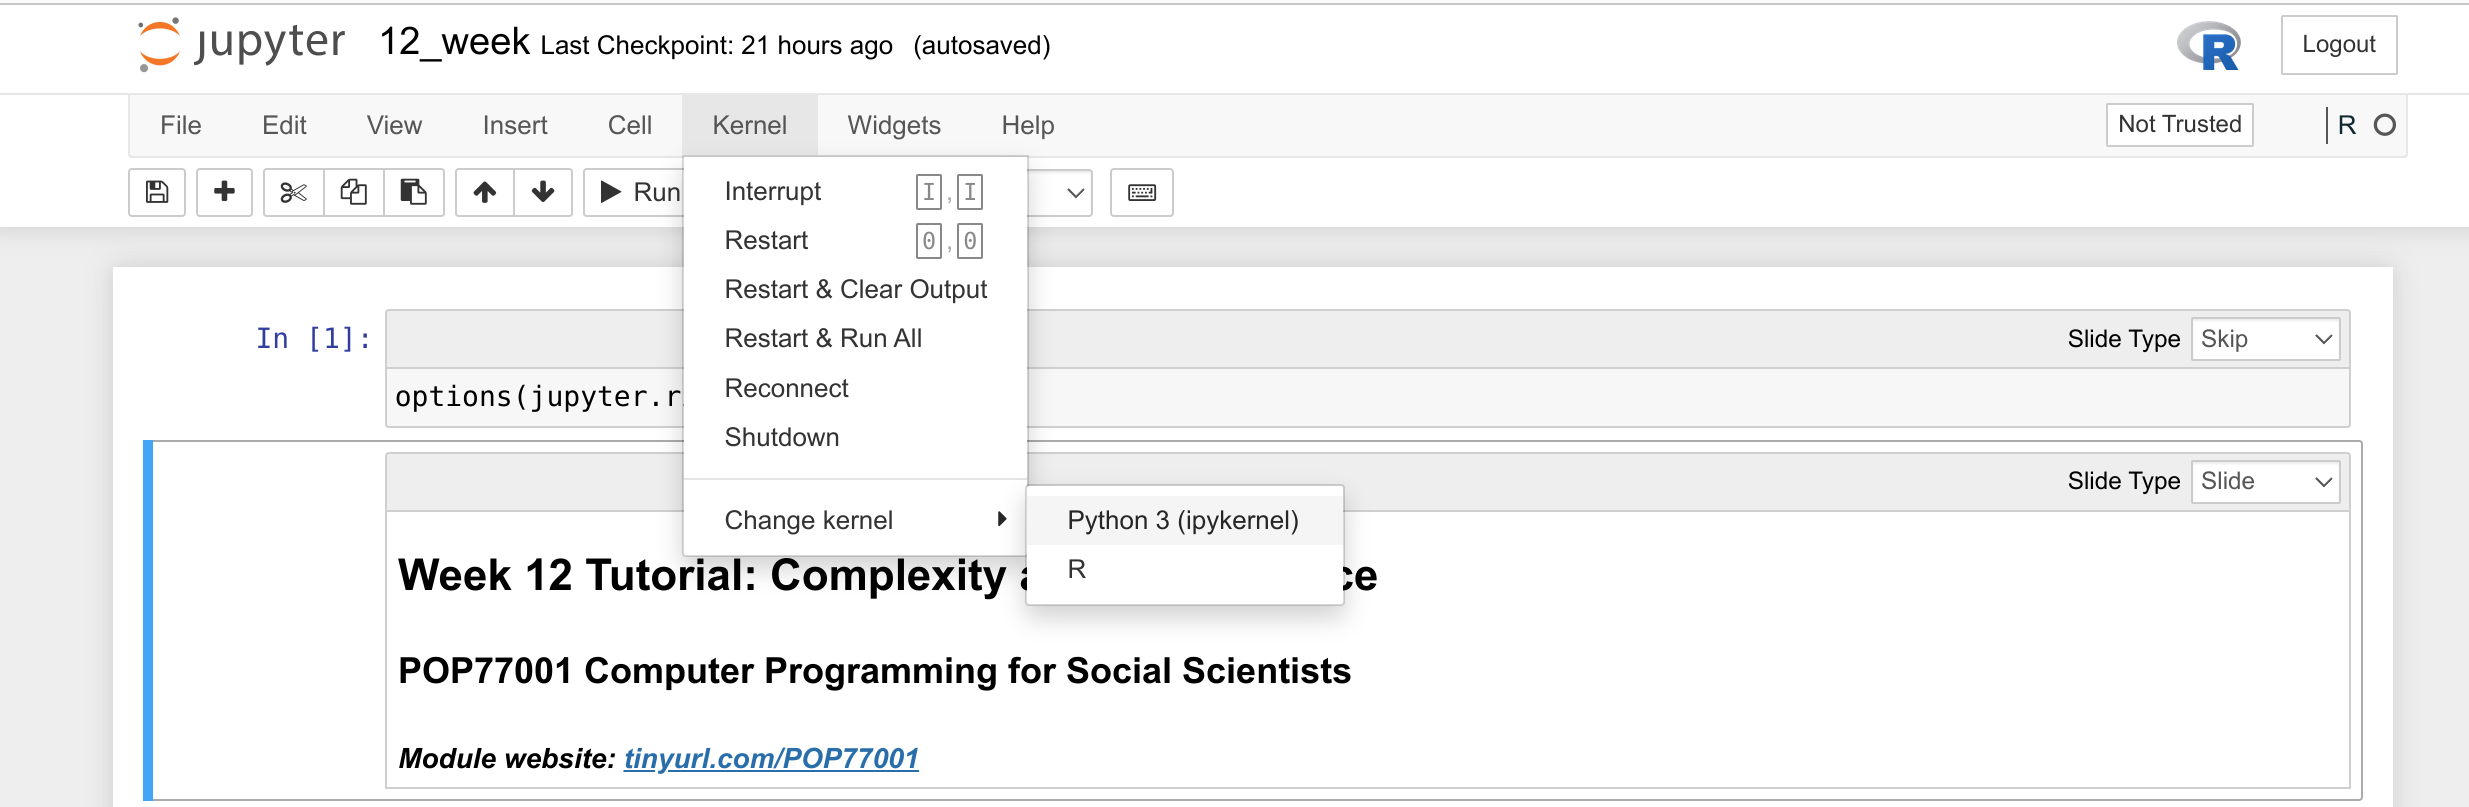

##

In [ ]:
import random
import numpy as np
import pandas as pd

. . .

In [ ]:
# Random numbers in Python can be generated either using
# the built-in `random` module or using `numpy` external
# module (which is underlying a lot of `pandas` operations)
random.gauss(mu = 0, sigma = 1)

-0.27884501349828017

. . .

In [ ]:
# Instead of just a float number it returns an array
np.random.randn(1)

array([2.06101337])

##

In [ ]:
# Let's start our benchmarking experiments from looking
# at random number generation in Python.
# First let's draw a sample of 1M using both built-in `random` module
# And `numpy`'s methods

. . .

In [ ]:
N = 1000000

. . .

In [ ]:
# We can use `for _` expression to indicate that returned value is being discarded
%timeit [random.gauss(mu = 0, sigma = 1) for _ in range(N)]

invalid syntax (<string>, line 2)

. . .

In [ ]:
# `numpy` is order of magnitude faster than built-in module
%timeit np.random.normal(size = N)

invalid syntax (<string>, line 2)

## Exercise: Compare Performance in Python

-   Now let’s replicate the calculation of some summary statistics in
    `pandas` DataFrame.
-   As in the case of R, there are 2 principal ways of doing this:
    -   First, is iterating over columns in a data set with a list
        comprehension and applying some function to each of columns
        (e.g. `mean()` from `statistics` module).
    -   Alternatively, you can apply one of the built-in statistical
        summary methods (check Week 10 for the list).
-   Apply each of those approaches to the data frame below.
-   How do these two approaches compare?

##

In [ ]:
from statistics import mean

. . .

In [ ]:
# Setting seed using 'numpy' is slightly more involved than with 'random' module (or R)
# We first need to create a random number generator object, that we can than use
# to generate random draws from distributions that are consistent across re-runs
rng = np.random.default_rng(1234)

# Here we are, essentially, replicating the process of data frame creation as in R above
# each variable is a random draw from a normal distribution with mean
# drawn from a uniform distribution between 0 and 10 and standard deviation 1
df2 = pd.DataFrame(np.concatenate([
    rng.normal(loc = x, scale = 1, size = (1000, 1))
    for x
    in rng.uniform(low = 0, high = 10, size = 50)
], axis = 1))

. . .

In [ ]:
df2.shape

(1000, 50)

## Next

-   Final project: Due by 23:59 on Friday, 19th December (submission on
    Blackboard)